# Pentathlon-III: Next Product to Buy Models

* Team-lead GitLab userid:
* Group name:
* Team member names:

## Setup

Please complete this python notebook with your group by answering the questions in `pentathlon-nptb.pdf`. Create a Notebook and HTML file with all your results and comments and push both the Notebook and HTML file to GitLab when your team is done. All results MUST be reproducible (i.e., the TA and I must be able to recreate the HTML file from the Jupyter Notebook without changes or errors). This means that you should NOT use any python-packages that are not part of the rsm-msba-spark docker container.

This is the third group assignment for MGTA 455 and you will be using Git and GitLab. If two people edit the same file at the same time you could get what is called a "merge conflict". This is not something serious but you should realize that Git will not decide for you who's change to accept so the team-lead will have to determine the edits to use. To avoid merge conflicts, **always** "pull" changes to the repo before you start working on any files. Then, when you are done, save and commit your changes, and then push them to GitLab. Make "pull first" a habit!

If multiple people are going to work on the assignment at the same time I recommend you work in different notebooks. You can then `%run ...`  these "sub" notebooks from the main assignment file. You can seen an example of this in action below for the `model1.ipynb` notebook

Some group work-flow tips:

* Pull, edit, save, stage, commit, and push
* Schedule who does what and when
* Try to avoid working simultaneously on the same file 
* If you are going to work simultaneously, do it in different notebooks, e.g., 
    - model1.ipynb, model2.ipynb, model3.ipynb
* Use the `%run ... ` command to bring different pieces of code together into the main jupyter notebook
* Put python functions in modules that you can import from your notebooks. See the example below for the `example` function defined in `utils/functions.py`

A graphical depiction of the group work-flow is shown below:

![](images/git-group-workflow-wbg.png)

Tutorial videos about using Git, GitLab, and GitGadget for group assignments:

* Setup the MSBA server to use Git and GitLab: https://youtu.be/zJHwodmjatY
* Dealing with Merge Conflicts: https://youtu.be/qFnyb8_rgTI
* Group assignment practice: https://youtu.be/4Ty_94gIWeA

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pyrsm as rsm
import statsmodels.formula.api as smf
from sklearn import preprocessing
from statsmodels.genmod.families import Binomial
from statsmodels.genmod.families.links import logit

# increase plot resolution
# mpl.rcParams["figure.dpi"] = 150

In [2]:
## loading the data - this dataset must NOT be changed
pentathlon_nptb = pd.read_pickle("data/pentathlon_nptb.pkl")
pentathlon_nptb["buyer_yes"] = (pentathlon_nptb["buyer"] == "yes").astype(int)

pentathlon_nptb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 26 columns):
 #   Column            Non-Null Count   Dtype   
---  ------            --------------   -----   
 0   custid            200000 non-null  object  
 1   buyer             200000 non-null  category
 2   total_os          200000 non-null  float64 
 3   message           200000 non-null  category
 4   age               200000 non-null  category
 5   gender            200000 non-null  category
 6   income            200000 non-null  int32   
 7   education         200000 non-null  int32   
 8   children          200000 non-null  float64 
 9   freq_endurance    200000 non-null  int32   
 10  freq_strength     200000 non-null  int32   
 11  freq_water        200000 non-null  int32   
 12  freq_team         200000 non-null  int32   
 13  freq_backcountry  200000 non-null  int32   
 14  freq_winter       200000 non-null  int32   
 15  freq_racquet      200000 non-null  int32   
 16  en

In [3]:
pentathlon_nptb["cweight"] = rsm.ifelse(pentathlon_nptb.buyer == "yes", 1, 99)

In [4]:
# show dataset description
rsm.describe(pentathlon_nptb)

## Pentathon III: Next Product To Buy 

The available data is based on the last e-mail sent to each Pentathlon customer. Hence, an observation or row in the data is a "customer-promotional e-mail" pair. The data contains the following basic demographic information available to Pentathlon:

* "age": Customer age(coded in 4 buckets:"<30", "30 to 44", "45 to 59", and ">=60") 
* "gender": Gender coded as F or M
* "income": Income in Euros, rounded to the nearest €5,000
* "education": Percentage of college graduates in the customer's neighborhood, coded from 0-100
* "children": Average number of children in the customer's neighborhood

The data also contains basic historical information about customer purchases, specifically, a department-specific frequency measure.

* "freq_endurance-freq_racquet": Number of purchases in each department in the last year, excluding any purchase in response to the last email.

The key outcome variables are:

* "buyer": Did the customer click on the e-mail and complete a purchase within twodays of receiving the e-mail ("yes" or "no")?
* "total_os": Total order size (in Euros) conditional on the customer having purchased (buyer == "yes"). This measures spending across all departments, not just the department that sent the message

While of no importance for the prediction model, we also have data on which departments the customer ordered from when they purchased. This was captured in:

* "endurance_os - racquet_os": Department-specific order size (in Euros). This was a breakdown of the total order size if buyer == "yes". The value was zero for most departments because customers rarely bought products from multiple departments on a single purchase occasion.

Finally, Anna requested that her team divide the data into a training sample and a test sample using a 70 - 30 split. She suggested 70,000 observations in the training sample and 30,000 observations in the test sample. Anna requested the team sample more customers who purchased relative to those that did not purchase. She had learned that some analytical tools did a better job of scoring customers if the response variable had a similar number of "yes" and "no" values.

To achieve a 50/50 split between buyers and non-buyers for the training and test sample, her team randomly picked 50,000 buyers and added 50,000 randomly sampled non-buyers. Given the actual average purchase rate of 1%, buyers in this training sample were oversampled by a factor of 50 (=0.5/0.01). The 100,000 customers were then randomly split into a training sample (70,000 customers) and a test sample (30,000 customers).

In addition to the 100,000 customers used for training and test, Anna asked the team to add a representative sample consisting of another 100,000 customers. This sample was representative in that it was a true random sample of the population and therefore contained the average proportion of buyers, namely 1%. This sample would be used to determine the expected benefits from using a next-product-to-buy model. In summary, the dataset contains 200,000 customers.

1. 70,000 in a training sample (training == 1) 
2. 30,000 in a test sample (training == 0)
3. 100,000 in a representative sample (use is.na(training) or representative == 1)

In [5]:
# run python code from another notebook
# %run ./sub-notebooks/model1.ipynb

In [6]:
# importing functions from a module/package
# from utils import functions
# functions.example()

In [7]:
## Question answers

In [8]:
pentathlon_nptb.buyer_yes.value_counts(dropna=False) 

0    149000
1     51000
Name: buyer_yes, dtype: int64

In [9]:
train = pentathlon_nptb[pentathlon_nptb["training"] == 1]
test = pentathlon_nptb[pentathlon_nptb["training"] == 0]
rep = pentathlon_nptb[pentathlon_nptb["representative"] == 1]

In [10]:
lri = smf.glm(
    formula="buyer_yes ~ message:age + message:gender + message:income + message:education+\
             message:children + message:freq_endurance + message:freq_strength + message:freq_water+\
             message:freq_team + message:freq_backcountry + message:freq_winter + message:freq_racquet",
    family=Binomial(link=logit()),
    data=train,
    freq_weights=train["cweight"],    
).fit(cov_type="HC1")
rsm.or_ci(lri)

,index,OR,OR%,2.5%,97.5%,p.values,
1,age[T.30 to 44],1.972,97.2%,1.782,2.183,< .001,***
2,age[T.45 to 59],2.077,107.7%,1.870,2.308,< .001,***
3,age[T.>= 60],1.080,8.0%,0.947,1.232,0.248,
4,message[T.strength]:age[< 30],0.558,-44.2%,0.453,0.687,< .001,***
5,message[T.water]:age[< 30],0.867,-13.3%,0.706,1.066,0.175,
...,...,...,...,...,...,...,...
100,message[water]:freq_racquet,1.184,18.4%,1.163,1.206,< .001,***
101,message[team]:freq_racquet,1.096,9.6%,1.077,1.117,< .001,***
102,message[backcountry]:freq_racquet,1.117,11.7%,1.097,1.137,< .001,***
103,message[winter]:freq_racquet,1.162,16.2%,1.142,1.183,< .001,***


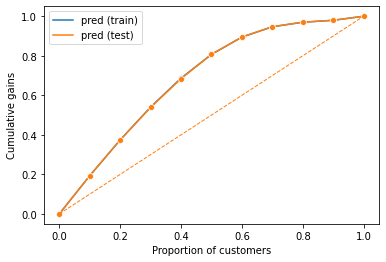

In [11]:
pred_train = pd.DataFrame().assign(
    actual = train["buyer_yes"], pred = lri.predict(train)
)
pred_test = pd.DataFrame().assign(actual = test["buyer_yes"], pred=lri.predict(test))


dct = {"train":pred_train, "test":pred_test}
fig = rsm.gains_plot(dct, "actual", 1, "pred").legend(title=None)

In [12]:
pentathlon_nptb["p_team"] = lri.predict(pentathlon_nptb.assign(message="team"))
pentathlon_nptb["p_racquet"] = lri.predict(pentathlon_nptb.assign(message="racquet"))
pentathlon_nptb["p_winter"] = lri.predict(pentathlon_nptb.assign(message="winter"))
pentathlon_nptb["p_backcountry"] = lri.predict(pentathlon_nptb.assign(message="backcountry"))
pentathlon_nptb["p_water"] = lri.predict(pentathlon_nptb.assign(message="water"))
pentathlon_nptb["p_strength"] = lri.predict(pentathlon_nptb.assign(message="strength"))
pentathlon_nptb["p_endurance"] = lri.predict(pentathlon_nptb.assign(message="endurance"))

In [13]:
pentathlon_nptb["to_offer"] = (
    pentathlon_nptb[["p_team", "p_racquet", "p_winter", "p_backcountry", "p_water", "p_strength", "p_endurance"]]
    .idxmax(axis=1)
    .str.replace("p_team", "Team")
    .replace("p_racquet", "Racquet")
    .replace("p_winter", "Winter")
    .replace("p_backcountry", "Backcountry")
    .replace("p_water", "Water")
    .replace("p_strength", "Strength")
    .replace("p_endurance", "Endurance")
)

In [14]:
pentathlon_nptb["p_target"] = pentathlon_nptb[["p_team", "p_racquet", "p_winter","p_backcountry","p_water","p_strength","p_endurance"]].max(axis=1)

In [15]:
pentathlon_nptb[["p_team", "p_racquet", "p_winter","p_backcountry","p_water","p_strength","p_endurance","p_target"]].agg(np.mean).sort_values(
    ascending=False
).apply(rsm.format_nr, perc=True)

p_target         4.41%
p_strength       3.69%
p_endurance      3.62%
p_winter         3.28%
p_racquet        2.99%
p_water          2.94%
p_backcountry    2.91%
p_team           2.84%
dtype: object

In [16]:
###q1 = to_offer column
train = pentathlon_nptb[pentathlon_nptb["training"] == 1]
rep = pentathlon_nptb[pentathlon_nptb["representative"] == 1]
rep

,custid,buyer,total_os,message,age,gender,income,education,children,freq_endurance,...,cweight,p_team,p_racquet,p_winter,p_backcountry,p_water,p_strength,p_endurance,to_offer,p_target
0,U45198803,no,0.0,endurance,30 to 44,M,25000,14,1.3,0,...,99,0.002404,0.001930,0.001840,0.001525,0.002530,0.002491,0.002200,Water,0.002530
1,U22197752,no,0.0,backcountry,45 to 59,F,40000,44,0.4,2,...,99,0.005931,0.004949,0.004404,0.006291,0.006965,0.004228,0.006259,Water,0.006965
3,U19423462,no,0.0,winter,45 to 59,F,50000,26,1.1,1,...,99,0.003037,0.002831,0.003548,0.003715,0.004073,0.003333,0.004763,Endurance,0.004763
4,U23888305,no,0.0,winter,30 to 44,M,40000,22,1.0,1,...,99,0.004534,0.004410,0.004178,0.003614,0.004843,0.005803,0.004756,Strength,0.005803
6,U16954857,no,0.0,winter,30 to 44,M,30000,18,0.6,0,...,99,0.001475,0.001712,0.001393,0.001428,0.001794,0.001799,0.001826,Endurance,0.001826
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199991,U12620333,no,0.0,backcountry,45 to 59,F,40000,23,0.7,0,...,99,0.001466,0.001341,0.001397,0.001814,0.001561,0.001306,0.001901,Endurance,0.001901
199993,U18623424,no,0.0,strength,>= 60,F,55000,41,0.7,0,...,99,0.002058,0.002312,0.001901,0.002129,0.002976,0.002052,0.002807,Water,0.002976
199994,U64468968,no,0.0,racquet,< 30,M,45000,32,1.1,2,...,99,0.003914,0.003367,0.002740,0.003070,0.004051,0.003754,0.003965,Water,0.004051
199998,U33721691,no,0.0,strength,30 to 44,M,25000,10,1.3,0,...,99,0.001727,0.001498,0.001442,0.001207,0.001953,0.001861,0.001814,Water,0.001953


Approach: We build a logistic regression model and use buyer_yes as the response variable, and use interactions, such as message and age, as explanatory variables to estimate the probability of purchasing for each customer. To predict the probability of purchasing for different messages, we assigned only one category in the message column and use the model to predict the probability of purchasing, then we are able to get the probability of purchasing for that specific category. Then, we repeat this process 7 times and get 7 new columns with probability. Finally, we choose the highest probability, and also it's column name from these 7 columns so that we can determine the message predicted to lead to the highest probability of purchase.

In [17]:
###q2
q2 = rep.to_offer.value_counts(normalize=True)
q2

Endurance      0.40616
Strength       0.20492
Water          0.18550
Team           0.10945
Backcountry    0.04354
Racquet        0.03215
Winter         0.01828
Name: to_offer, dtype: float64

In [18]:
###Q3
ordersize = train[train["buyer_yes"] == 1].groupby("message")["total_os"].mean()

In [19]:
ordersize

message
endurance      54.291731
strength       55.897158
water          57.271440
team           57.511926
backcountry    60.678709
winter         59.090031
racquet        57.769309
Name: total_os, dtype: float64

In [20]:
pentathlon_nptb["ep_team"] = pentathlon_nptb.p_team * ordersize.team * 0.4
pentathlon_nptb["ep_racquet"] = pentathlon_nptb.p_racquet * ordersize.racquet * 0.4
pentathlon_nptb["ep_winter"] = pentathlon_nptb.p_winter * ordersize.winter * 0.4
pentathlon_nptb["ep_backcountry"] = pentathlon_nptb.p_backcountry * ordersize.backcountry * 0.4
pentathlon_nptb["ep_water"] = pentathlon_nptb.p_water * ordersize.water * 0.4
pentathlon_nptb["ep_strength"] = pentathlon_nptb.p_strength * ordersize.strength * 0.4
pentathlon_nptb["ep_endurance"] = pentathlon_nptb.p_endurance * ordersize.endurance * 0.4

In [21]:
pentathlon_nptb["ep_target"] = pentathlon_nptb[["ep_team", "ep_racquet", "ep_winter",
                                                "ep_backcountry", "ep_water", "ep_strength", "ep_endurance"]].max(axis=1)
pentathlon_nptb["to_offer_ep"] = (
    pentathlon_nptb[["ep_team", "ep_racquet", "ep_winter", "ep_backcountry", "ep_water", "ep_strength", "ep_endurance"]]
    .idxmax(axis=1)
    .str.replace("ep_team", "Team")
    .replace("ep_racquet", "Racquet")
    .replace("ep_winter", "Winter")
    .replace("ep_backcountry", "Backcountry")
    .replace("ep_water", "Water")
    .replace("ep_strength", "Strength")
    .replace("ep_endurance", "Endurance")
)


In [22]:
rep = pentathlon_nptb[pentathlon_nptb["representative"] == 1]
rep

,custid,buyer,total_os,message,age,gender,income,education,children,freq_endurance,...,p_target,ep_team,ep_racquet,ep_winter,ep_backcountry,ep_water,ep_strength,ep_endurance,ep_target,to_offer_ep
0,U45198803,no,0.0,endurance,30 to 44,M,25000,14,1.3,0,...,0.002530,0.055310,0.044595,0.043491,0.037023,0.057969,0.055689,0.047781,0.057969,Water
1,U22197752,no,0.0,backcountry,45 to 59,F,40000,44,0.4,2,...,0.006965,0.136436,0.114350,0.104085,0.152699,0.159568,0.094524,0.135915,0.159568,Water
3,U19423462,no,0.0,winter,45 to 59,F,50000,26,1.1,1,...,0.004763,0.069867,0.065427,0.083864,0.090173,0.093304,0.074515,0.103430,0.103430,Endurance
4,U23888305,no,0.0,winter,30 to 44,M,40000,22,1.0,1,...,0.005803,0.104300,0.101915,0.098758,0.087713,0.110947,0.129760,0.103288,0.129760,Strength
6,U16954857,no,0.0,winter,30 to 44,M,30000,18,0.6,0,...,0.001826,0.033943,0.039550,0.032914,0.034654,0.041098,0.040228,0.039648,0.041098,Water
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199991,U12620333,no,0.0,backcountry,45 to 59,F,40000,23,0.7,0,...,0.001901,0.033717,0.030990,0.033021,0.044026,0.035761,0.029196,0.041278,0.044026,Backcountry
199993,U18623424,no,0.0,strength,>= 60,F,55000,41,0.7,0,...,0.002976,0.047346,0.053424,0.044931,0.051663,0.068176,0.045883,0.060950,0.068176,Water
199994,U64468968,no,0.0,racquet,< 30,M,45000,32,1.1,2,...,0.004051,0.090042,0.077815,0.064774,0.074511,0.092794,0.083931,0.086101,0.092794,Water
199998,U33721691,no,0.0,strength,30 to 44,M,25000,10,1.3,0,...,0.001953,0.039718,0.034621,0.034076,0.029288,0.044733,0.041621,0.039388,0.044733,Water


In [23]:
###q4
rep.to_offer_ep.value_counts(normalize = True)

Endurance      0.23556
Water          0.23136
Strength       0.18167
Backcountry    0.14415
Team           0.12210
Racquet        0.05759
Winter         0.02757
Name: to_offer_ep, dtype: float64

In [24]:
###q5
q5 = rep["ep_target"].mean()
print(q5)

0.3287677220422354


In [25]:
###q6
(
    rep[["ep_team", "ep_racquet", "ep_winter", "ep_backcountry", "ep_water", "ep_strength", "ep_endurance"]]
    .agg(np.mean)
    .sort_values(ascending=False)
    .apply(rsm.format_nr, sym="$", dec=2)
).to_frame("expected profit")

,expected profit
ep_strength,$0.27
ep_endurance,$0.26
ep_water,$0.24
ep_winter,$0.24
ep_backcountry,$0.23
ep_racquet,$0.22
ep_team,$0.22


In [26]:
###q7
import random

message_list = ['ep_endurance', 'ep_team', 'ep_racquet', 'ep_winter', 'ep_backcountry', 'ep_water', 'ep_strength']

pentathlon_nptb["ran_target"] = np.float64(0.0)
for i in range(len(pentathlon_nptb)):
    if pentathlon_nptb["message"][i] == "strength":
        pentathlon_nptb["ran_target"][i] = pentathlon_nptb["ep_strength"][i]
    elif pentathlon_nptb["message"][i] == "endurance":
        pentathlon_nptb["ran_target"][i] = pentathlon_nptb["ep_endurance"][i]
    elif pentathlon_nptb["message"][i] == "water":
        pentathlon_nptb["ran_target"][i] = pentathlon_nptb["ep_water"][i]
    elif pentathlon_nptb["message"][i] == "winter":
        pentathlon_nptb["ran_target"][i] = pentathlon_nptb["ep_winter"][i]
    elif pentathlon_nptb["message"][i] == "backcountry":
        pentathlon_nptb["ran_target"][i] = pentathlon_nptb["ep_backcountry"][i]
    elif pentathlon_nptb["message"][i] == "racquet":
        pentathlon_nptb["ran_target"][i] = pentathlon_nptb["ep_racquet"][i]
    elif pentathlon_nptb["message"][i] == "team":
        pentathlon_nptb["ran_target"][i] = pentathlon_nptb["ep_team"][i]
    


<ipython-input-26-b622c9c3db95>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pentathlon_nptb["ran_target"][i] = pentathlon_nptb["ep_endurance"][i]
<ipython-input-26-b622c9c3db95>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pentathlon_nptb["ran_target"][i] = pentathlon_nptb["ep_backcountry"][i]
<ipython-input-26-b622c9c3db95>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pentathlon_nptb["ran_target"][i] = pentathlon_nptb[

In [27]:
pentathlon_nptb

,custid,buyer,total_os,message,age,gender,income,education,children,freq_endurance,...,ep_team,ep_racquet,ep_winter,ep_backcountry,ep_water,ep_strength,ep_endurance,ep_target,to_offer_ep,ran_target
0,U45198803,no,0.0,endurance,30 to 44,M,25000,14,1.3,0,...,0.055310,0.044595,0.043491,0.037023,0.057969,0.055689,0.047781,0.057969,Water,0.047781
1,U22197752,no,0.0,backcountry,45 to 59,F,40000,44,0.4,2,...,0.136436,0.114350,0.104085,0.152699,0.159568,0.094524,0.135915,0.159568,Water,0.152699
2,U83874832,no,0.0,backcountry,45 to 59,M,50000,24,0.8,0,...,0.146273,0.133888,0.093047,0.154875,0.115841,0.093901,0.136301,0.154875,Backcountry,0.154875
3,U19423462,no,0.0,winter,45 to 59,F,50000,26,1.1,1,...,0.069867,0.065427,0.083864,0.090173,0.093304,0.074515,0.103430,0.103430,Endurance,0.083864
4,U23888305,no,0.0,winter,30 to 44,M,40000,22,1.0,1,...,0.104300,0.101915,0.098758,0.087713,0.110947,0.129760,0.103288,0.129760,Strength,0.098758
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,U54280824,yes,448.0,backcountry,45 to 59,F,85000,55,1.2,0,...,1.046330,0.611077,2.126318,0.662656,1.056024,0.568772,0.870500,2.126318,Winter,0.662656
199996,U99229186,yes,52.0,strength,45 to 59,M,55000,53,0.9,1,...,0.564479,0.596011,0.451247,0.536820,0.740748,0.572361,0.954209,0.954209,Endurance,0.572361
199997,U83335706,no,0.0,racquet,>= 60,F,50000,33,2.2,1,...,0.233601,0.148541,0.162219,0.121289,0.331971,0.159644,0.204459,0.331971,Water,0.148541
199998,U33721691,no,0.0,strength,30 to 44,M,25000,10,1.3,0,...,0.039718,0.034621,0.034076,0.029288,0.044733,0.041621,0.039388,0.044733,Water,0.041621


In [28]:
rep = pentathlon_nptb[pentathlon_nptb["representative"] == 1]

In [29]:
q7 = rep["ran_target"].mean()
print(q7)

0.23942295983360407


In [30]:
###q8
profit_random = rep.ran_target.agg(np.mean) * 5000000
profit_logit = rep.ep_target.agg(np.mean) * 5000000
profit_improvement = profit_logit - profit_random
improvement_percentage = profit_improvement/profit_random
print(f"Expected profit from offer customization: ${profit_logit:,.2f}")
print(f"Expected profit from offer randomly: ${profit_random:,.2f}")
print(f"Expected profit improvement: ${profit_improvement:,.2f}")
print(f"Expected profit improvement percentage: {improvement_percentage:,.2f}")

Expected profit from offer customization: $1,643,838.61
Expected profit from offer randomly: $1,197,114.80
Expected profit improvement: $446,723.81
Expected profit improvement percentage: 0.37


***XGboost***

In [31]:
pentathlon_xgb = pd.read_pickle("data/pentathlon_nptb.pkl")
pentathlon_xgb["buyer_yes"] = (pentathlon_xgb["buyer"] == "yes").astype(int)

In [32]:
pentathlon_xgb = pd.concat(
    [
        pentathlon_xgb,
        pd.get_dummies(pentathlon_xgb["message"], prefix='message', drop_first = False),
        pd.get_dummies(pentathlon_xgb["age"], prefix='age', drop_first = False),
        pd.get_dummies(pentathlon_xgb["gender"], prefix='gender', drop_first = True)
        ],
    axis = 1   
)

In [33]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()

columns = ["income", "education", "children", "freq_endurance", "freq_strength", "freq_water", "freq_team","freq_backcountry","freq_winter","freq_racquet"]
columns_01 = ["income_01", "education_01", "children_01", "freq_endurance_01", "freq_strength_01", "freq_water_01", "freq_team_01","freq_backcountry_01","freq_winter_01","freq_racquet_01"]
x = pentathlon_xgb[columns]
features_01 = pd.DataFrame(min_max_scaler.fit_transform(x), columns = columns_01)

pentathlon_xgb = pd.concat(
    [
        pentathlon_xgb,
        features_01
        ],
    axis = 1 
)

pentathlon_xgb.drop(columns, axis = 1, inplace = True)

In [34]:
# create interactions
message_lst = ['message_endurance', 'message_strength',
       'message_water', 'message_team', 'message_backcountry',
       'message_winter', 'message_racquet']

age_lst = ['age_< 30', 'age_30 to 44','age_45 to 59', 'age_>= 60']


for message in message_lst:
    for ages in age_lst:
        pentathlon_xgb[message + "_" + ages] = pentathlon_xgb[message] * pentathlon_xgb[ages]
        
for message in message_lst:
    pentathlon_xgb[message + "_" + "gender_F"] = pentathlon_xgb[message] * pentathlon_xgb["gender_F"]
    
for message in message_lst:
    pentathlon_xgb[message + "_" + "income_01"] = pentathlon_xgb[message] * pentathlon_xgb["income_01"]
    
for message in message_lst:
    pentathlon_xgb[message + "_" + "education_01"] = pentathlon_xgb[message] * pentathlon_xgb["education_01"]
    
for message in message_lst:
    pentathlon_xgb[message + "_" + "children_01"] = pentathlon_xgb[message] * pentathlon_xgb["children_01"]
    
for message in message_lst:
    pentathlon_xgb[message + "_" + "freq_endurance_01"] = pentathlon_xgb[message] * pentathlon_xgb["freq_endurance_01"]
    
for message in message_lst:
    pentathlon_xgb[message + "_" + "freq_strength_01"] = pentathlon_xgb[message] * pentathlon_xgb["freq_strength_01"]
    
for message in message_lst:
    pentathlon_xgb[message + "_" + "freq_water_01"] = pentathlon_xgb[message] * pentathlon_xgb["freq_water_01"]

for message in message_lst:
    pentathlon_xgb[message + "_" + "freq_team_01"] = pentathlon_xgb[message] * pentathlon_xgb["freq_team_01"]
    
for message in message_lst:
    pentathlon_xgb[message + "_" + "freq_backcountry_01"] = pentathlon_xgb[message] * pentathlon_xgb["freq_backcountry_01"]
    
for message in message_lst:
    pentathlon_xgb[message + "_" + "freq_winter_01"] = pentathlon_xgb[message] * pentathlon_xgb["freq_winter_01"]
    
for message in message_lst:
    pentathlon_xgb[message + "_" + "freq_racquet_01"] = pentathlon_xgb[message] * pentathlon_xgb["freq_racquet_01"]
    
pentathlon_xgb.drop(message_lst, axis = 1, inplace = True)
pentathlon_xgb.drop(age_lst, axis = 1, inplace = True)
pentathlon_xgb.drop("gender_F", axis = 1, inplace = True)
pentathlon_xgb.drop("income_01", axis = 1, inplace = True)
pentathlon_xgb.drop("education_01", axis = 1, inplace = True)
pentathlon_xgb.drop("children_01", axis = 1, inplace = True)
pentathlon_xgb.drop("freq_endurance_01", axis = 1, inplace = True)
pentathlon_xgb.drop("freq_strength_01", axis = 1, inplace = True)
pentathlon_xgb.drop("freq_water_01", axis = 1, inplace = True)
pentathlon_xgb.drop("freq_team_01", axis = 1, inplace = True)
pentathlon_xgb.drop("freq_backcountry_01", axis = 1, inplace = True)
pentathlon_xgb.drop("freq_winter_01", axis = 1, inplace = True)
pentathlon_xgb.drop("freq_racquet_01", axis = 1, inplace = True)

In [35]:
pentathlon_xgb = pentathlon_xgb.iloc[:,13:]

In [36]:
train = pentathlon_xgb[pentathlon_xgb["training"] == 1]
test = pentathlon_xgb[pentathlon_xgb["training"] == 0]
rep = pentathlon_xgb[pentathlon_xgb["representative"] == 1]

train.drop(["training"], axis = 1, inplace = True)
test.drop(["training"], axis = 1, inplace = True)
rep.drop(["training"], axis = 1, inplace = True)

train.drop(["representative"], axis = 1, inplace = True)
test.drop(["representative"], axis = 1, inplace = True)
rep.drop(["representative"], axis = 1, inplace = True)

y_train = np.array(train["buyer_yes"])
y_test = np.array(test["buyer_yes"])
y_rep = np.array(rep["buyer_yes"])

train.drop(["buyer_yes"], axis = 1, inplace = True)
test.drop(["buyer_yes"], axis = 1, inplace = True)
rep.drop(["buyer_yes"], axis = 1, inplace = True)

x_train = np.array(train)
x_test = np.array(test)
x_rep = np.array(rep)

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [37]:
from sklearn import metrics
from sklearn.inspection import permutation_importance
from sklearn.model_selection import GridSearchCV, cross_val_score, train_test_split
from sklearn.model_selection import StratifiedKFold
import xgboost as xgb

#First, define your model here
xgb = xgb.XGBClassifier()

#Then, set hyperparameters you want to add in grid search
parameters = {'nthread':[4],
              'objective':['binary:logistic'],
              'gamma':[0.7], 
              'eta': [0.2],
              'max_delta_step':[0],
              'sampling_method':['uniform'],
              'max_depth': [10],
              'min_child_weight': [1],
              'subsample': [0.75],
              'colsample_bytree': [1],
              'colsample_bylevel':[1],
              'colsample_bynode':[1],
              'n_estimators': [150], 
              'scale_pos_weight': [1/99],
              'reg_alpha':[0.035],
              'silent': [1],
              'missing':[-999],
              'seed': [1949]}

clf = GridSearchCV(xgb, parameters, 
                   n_jobs=8, #n_jobs means number of jobs to run in parallel. 5 will use 5 of your CPU processors
                   cv = StratifiedKFold(3).split(x_train, y_train), #Unbalnaced data, thus StratifiedKFold
                   scoring='roc_auc',
                   verbose=2, refit=True)

#Fit your model here
clf.fit(x_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


/usr/local/lib/python3.8/dist-packages/xgboost/sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:15] WARNING: ../src/learner.cc:573: 
Parameters: { "silent" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[23:18:15] WARNING: ../src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f169e6e30b0>,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=None, min_child_weight=None,
                                     missing=nan, m...
                         'colsample_bytree': [1], 'eta': [0.2], 'gamma': [0.7],
                         'max_delta_step': [0], 'max_depth': [10],
                         'min_child_weight': [1], 'missing': [-999],
                         'n_estimators': [150], 'nthread': [4],
                         'objective': 

In [38]:
clf.best_params_

{'colsample_bylevel': 1,
 'colsample_bynode': 1,
 'colsample_bytree': 1,
 'eta': 0.2,
 'gamma': 0.7,
 'max_delta_step': 0,
 'max_depth': 10,
 'min_child_weight': 1,
 'missing': -999,
 'n_estimators': 150,
 'nthread': 4,
 'objective': 'binary:logistic',
 'reg_alpha': 0.035,
 'sampling_method': 'uniform',
 'scale_pos_weight': 0.010101010101010102,
 'seed': 1949,
 'silent': 1,
 'subsample': 0.75}

/usr/local/lib/python3.8/dist-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


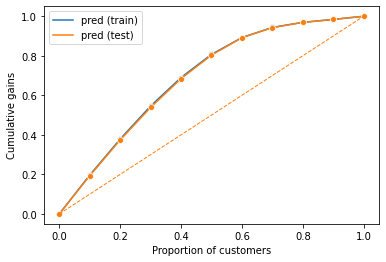

In [39]:
pred_train = pd.DataFrame().assign(
    actual = y_train, pred = clf.predict_proba(x_train)[:, 1]
)
pred_test = pd.DataFrame().assign(actual = y_test, pred=clf.predict_proba(x_test)[:, 1])

dct = {"train": pred_train, "test": pred_test}
fig = rsm.gains_plot(dct, "actual", 1, "pred").legend(title=None)

In [40]:
from sklearn.metrics import roc_auc_score


print("AUC is:", roc_auc_score(y_test, clf.predict_proba(x_test)[:, 1]))

AUC is: 0.8791228688888889


/usr/local/lib/python3.8/dist-packages/xgboost/data.py:112: UserWarning: Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption
  warnings.warn(


In [41]:
import warnings
warnings.filterwarnings("ignore")

In [42]:
pentathlon_xgb_diff_result = pd.read_pickle("data/pentathlon_nptb.pkl")

In [43]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score


message_lst = ['message_endurance', 'message_strength',
       'message_water', 'message_team', 'message_backcountry',
       'message_winter', 'message_racquet']

age_lst = ['age_< 30', 'age_30 to 44','age_45 to 59', 'age_>= 60']

for i in list(message_lst):
    
    #################################################################################################################################

    pentathlon_xgb_diff_mess = pd.read_pickle("data/pentathlon_nptb.pkl")
    pentathlon_xgb_diff_mess["buyer_yes"] = (pentathlon_xgb_diff_mess["buyer"] == "yes").astype(int)
    ###
    pentathlon_xgb_diff_mess = pd.concat(
        [
            pentathlon_xgb_diff_mess,
            pd.get_dummies(pentathlon_xgb_diff_mess["message"], prefix='message', drop_first = False),
            pd.get_dummies(pentathlon_xgb_diff_mess["age"], prefix='age', drop_first = False),
            pd.get_dummies(pentathlon_xgb_diff_mess["gender"], prefix='gender', drop_first = True)
            ],
        axis = 1   
    )
    ###
    from sklearn import preprocessing
    min_max_scaler = preprocessing.MinMaxScaler()

    columns = ["income", "education", "children", "freq_endurance", "freq_strength", "freq_water", "freq_team","freq_backcountry","freq_winter","freq_racquet"]
    columns_01 = ["income_01", "education_01", "children_01", "freq_endurance_01", "freq_strength_01", "freq_water_01", "freq_team_01","freq_backcountry_01","freq_winter_01","freq_racquet_01"]
    x = pentathlon_xgb_diff_mess[columns]
    features_01 = pd.DataFrame(min_max_scaler.fit_transform(x), columns = columns_01)

    pentathlon_xgb_diff_mess = pd.concat(
        [
            pentathlon_xgb_diff_mess,
            features_01
            ],
        axis = 1 
    )

    pentathlon_xgb_diff_mess.drop(columns, axis = 1, inplace = True)
    
    #################################################################################################################################
    
    #print(i)
    pentathlon_xgb_diff_mess[i] = 1
    message_lst_temp = message_lst.copy()
    message_lst_temp.remove(i)
    #print(message_lst_temp)
    for j in message_lst_temp:
        #print(j)
        pentathlon_xgb_diff_mess[j] = 0
    #print(pentathlon_xgb_diff_mess[message_lst].head())
        
    #################################################################################################################################
    for message in message_lst:
        for ages in age_lst:
            pentathlon_xgb_diff_mess[message + "_" + ages] = pentathlon_xgb_diff_mess[message] * pentathlon_xgb_diff_mess[ages]

    for message in message_lst:
        pentathlon_xgb_diff_mess[message + "_" + "gender_F"] = pentathlon_xgb_diff_mess[message] * pentathlon_xgb_diff_mess["gender_F"]

    for message in message_lst:
        pentathlon_xgb_diff_mess[message + "_" + "income_01"] = pentathlon_xgb_diff_mess[message] * pentathlon_xgb_diff_mess["income_01"]

    for message in message_lst:
        pentathlon_xgb_diff_mess[message + "_" + "education_01"] = pentathlon_xgb_diff_mess[message] * pentathlon_xgb_diff_mess["education_01"]

    for message in message_lst:
        pentathlon_xgb_diff_mess[message + "_" + "children_01"] = pentathlon_xgb_diff_mess[message] * pentathlon_xgb_diff_mess["children_01"]

    for message in message_lst:
        pentathlon_xgb_diff_mess[message + "_" + "freq_endurance_01"] = pentathlon_xgb_diff_mess[message] * pentathlon_xgb_diff_mess["freq_endurance_01"]

    for message in message_lst:
        pentathlon_xgb_diff_mess[message + "_" + "freq_strength_01"] = pentathlon_xgb_diff_mess[message] * pentathlon_xgb_diff_mess["freq_strength_01"]

    for message in message_lst:
        pentathlon_xgb_diff_mess[message + "_" + "freq_water_01"] = pentathlon_xgb_diff_mess[message] * pentathlon_xgb_diff_mess["freq_water_01"]

    for message in message_lst:
        pentathlon_xgb_diff_mess[message + "_" + "freq_team_01"] = pentathlon_xgb_diff_mess[message] * pentathlon_xgb_diff_mess["freq_team_01"]

    for message in message_lst:
        pentathlon_xgb_diff_mess[message + "_" + "freq_backcountry_01"] = pentathlon_xgb_diff_mess[message] * pentathlon_xgb_diff_mess["freq_backcountry_01"]

    for message in message_lst:
        pentathlon_xgb_diff_mess[message + "_" + "freq_winter_01"] = pentathlon_xgb_diff_mess[message] * pentathlon_xgb_diff_mess["freq_winter_01"]

    for message in message_lst:
        pentathlon_xgb_diff_mess[message + "_" + "freq_racquet_01"] = pentathlon_xgb_diff_mess[message] * pentathlon_xgb_diff_mess["freq_racquet_01"]

    pentathlon_xgb_diff_mess.drop(message_lst, axis = 1, inplace = True)
    pentathlon_xgb_diff_mess.drop(age_lst, axis = 1, inplace = True)
    pentathlon_xgb_diff_mess.drop("gender_F", axis = 1, inplace = True)
    pentathlon_xgb_diff_mess.drop("income_01", axis = 1, inplace = True)
    pentathlon_xgb_diff_mess.drop("education_01", axis = 1, inplace = True)
    pentathlon_xgb_diff_mess.drop("children_01", axis = 1, inplace = True)
    pentathlon_xgb_diff_mess.drop("freq_endurance_01", axis = 1, inplace = True)
    pentathlon_xgb_diff_mess.drop("freq_strength_01", axis = 1, inplace = True)
    pentathlon_xgb_diff_mess.drop("freq_water_01", axis = 1, inplace = True)
    pentathlon_xgb_diff_mess.drop("freq_team_01", axis = 1, inplace = True)
    pentathlon_xgb_diff_mess.drop("freq_backcountry_01", axis = 1, inplace = True)
    pentathlon_xgb_diff_mess.drop("freq_winter_01", axis = 1, inplace = True)
    pentathlon_xgb_diff_mess.drop("freq_racquet_01", axis = 1, inplace = True)

    #################################################################################################################################
    
    pentathlon_xgb_diff_mess = pentathlon_xgb_diff_mess.iloc[:,13:]
    #print(pentathlon_xgb_diff_mess)
    
    #################################################################################################################################


    pentathlon_xgb_diff_mess.drop(["training"], axis = 1, inplace = True)

    pentathlon_xgb_diff_mess.drop(["representative"], axis = 1, inplace = True)

    y = np.array(pentathlon_xgb_diff_mess["buyer_yes"])
    
    pentathlon_xgb_diff_mess.drop(["buyer_yes"], axis = 1, inplace = True)

    x = np.array(pentathlon_xgb_diff_mess)
    
    #################################################################################################################################
    

    pentathlon_xgb_diff_result[i+'_'+"proba"] = ''
    pentathlon_xgb_diff_result[i+'_'+"proba"] = clf.predict_proba(x)[:,1]

    
    #################################################################################################################################
    



In [44]:
pentathlon_xgb_diff_result[pentathlon_xgb_diff_result["representative"] == 1]

,custid,buyer,total_os,message,age,gender,income,education,children,freq_endurance,...,racquet_os,training,representative,message_endurance_proba,message_strength_proba,message_water_proba,message_team_proba,message_backcountry_proba,message_winter_proba,message_racquet_proba
0,U45198803,no,0.0,endurance,30 to 44,M,25000,14,1.3,0,...,0.0,-2147483648,1,0.002098,0.002205,0.001948,0.001723,0.001659,0.001939,0.001739
1,U22197752,no,0.0,backcountry,45 to 59,F,40000,44,0.4,2,...,0.0,-2147483648,1,0.005184,0.004133,0.005453,0.005311,0.004624,0.004974,0.004510
3,U19423462,no,0.0,winter,45 to 59,F,50000,26,1.1,1,...,0.0,-2147483648,1,0.001954,0.002542,0.002516,0.002394,0.002039,0.002515,0.002847
4,U23888305,no,0.0,winter,30 to 44,M,40000,22,1.0,1,...,0.0,-2147483648,1,0.003055,0.003982,0.002843,0.002958,0.002780,0.002970,0.003544
6,U16954857,no,0.0,winter,30 to 44,M,30000,18,0.6,0,...,0.0,-2147483648,1,0.001513,0.001707,0.001405,0.001405,0.001590,0.001576,0.001536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199991,U12620333,no,0.0,backcountry,45 to 59,F,40000,23,0.7,0,...,0.0,-2147483648,1,0.001311,0.001363,0.001306,0.001259,0.001424,0.001300,0.001327
199993,U18623424,no,0.0,strength,>= 60,F,55000,41,0.7,0,...,0.0,-2147483648,1,0.003669,0.002973,0.002552,0.002494,0.003363,0.002449,0.003470
199994,U64468968,no,0.0,racquet,< 30,M,45000,32,1.1,2,...,0.0,-2147483648,1,0.002768,0.003065,0.002490,0.002438,0.002338,0.003183,0.003683
199998,U33721691,no,0.0,strength,30 to 44,M,25000,10,1.3,0,...,0.0,-2147483648,1,0.001962,0.001937,0.001579,0.001523,0.001659,0.001897,0.001590


In [45]:
pentathlon_xgb_diff_result["to_offer"] = (
    pentathlon_xgb_diff_result[["message_endurance_proba", "message_strength_proba", "message_water_proba", "message_team_proba", "message_backcountry_proba", "message_winter_proba", "message_racquet_proba"]]
    .idxmax(axis=1)
    .str.replace("message_team_proba", "Team")
    .replace("message_racquet_proba", "Racquet")
    .replace("message_winter_proba", "Winter")
    .replace("message_backcountry_proba", "Backcountry")
    .replace("message_water_proba", "Water")
    .replace("message_strength_proba", "Strength")
    .replace("message_endurance_proba", "Endurance")
)

pentathlon_xgb_diff_result["to_offer"].value_counts(normalize = True)

Endurance      0.269645
Strength       0.240790
Backcountry    0.151475
Water          0.128990
Racquet        0.110625
Team           0.056940
Winter         0.041535
Name: to_offer, dtype: float64

In [46]:
pentathlon_xgb_diff_result["p_target"] = pentathlon_xgb_diff_result[["message_endurance_proba", "message_strength_proba", "message_water_proba", "message_team_proba", "message_backcountry_proba", "message_winter_proba", "message_racquet_proba"]].max(axis=1)

In [47]:
pentathlon_xgb_diff_result["buyer_yes"] = (pentathlon_xgb_diff_result["buyer"] == "yes").astype(int)

In [48]:
train1 = pentathlon_xgb_diff_result[pentathlon_xgb_diff_result["training"] == 1]

In [49]:
ordersize1 = train1[train1["buyer_yes"] == 1].groupby("message")["total_os"].mean()
ordersize1

message
endurance      54.291731
strength       55.897158
water          57.271440
team           57.511926
backcountry    60.678709
winter         59.090031
racquet        57.769309
Name: total_os, dtype: float64

In [50]:
pentathlon_xgb_diff_result["ep_team"] = pentathlon_xgb_diff_result.message_team_proba * ordersize1.team * 0.4
pentathlon_xgb_diff_result["ep_racquet"] = pentathlon_xgb_diff_result.message_racquet_proba * ordersize1.racquet * 0.4
pentathlon_xgb_diff_result["ep_winter"] = pentathlon_xgb_diff_result.message_winter_proba * ordersize1.winter * 0.4
pentathlon_xgb_diff_result["ep_backcountry"] = pentathlon_xgb_diff_result.message_backcountry_proba * ordersize1.backcountry * 0.4
pentathlon_xgb_diff_result["ep_water"] = pentathlon_xgb_diff_result.message_water_proba * ordersize1.water * 0.4
pentathlon_xgb_diff_result["ep_strength"] = pentathlon_xgb_diff_result.message_strength_proba * ordersize1.strength * 0.4
pentathlon_xgb_diff_result["ep_endurance"] = pentathlon_xgb_diff_result.message_endurance_proba * ordersize1.endurance * 0.4

In [51]:
pentathlon_xgb_diff_result["ep_target"] = pentathlon_xgb_diff_result[["ep_team", "ep_racquet", "ep_winter",
                                                "ep_backcountry", "ep_water", "ep_strength", "ep_endurance"]].max(axis=1)
pentathlon_xgb_diff_result["to_offer_ep"] = (
    pentathlon_xgb_diff_result[["ep_team", "ep_racquet", "ep_winter", "ep_backcountry", "ep_water", "ep_strength", "ep_endurance"]]
    .idxmax(axis=1)
    .str.replace("ep_team", "Team")
    .replace("ep_racquet", "Racquet")
    .replace("ep_winter", "Winter")
    .replace("ep_backcountry", "Backcountry")
    .replace("ep_water", "Water")
    .replace("ep_strength", "Strength")
    .replace("ep_endurance", "Endurance")
)


In [52]:
rep1 = pentathlon_xgb_diff_result[pentathlon_xgb_diff_result["representative"] == 1]
eq_mean_rep = rep1["ep_target"].mean()
print(eq_mean_rep)
print(q5)

0.4102142258690475
0.3287677220422354


In [53]:
profit_xgb = rep1["ep_target"].mean() * 5000000
profit_improvement1 = profit_xgb - profit_logit
improvement_percentage1 = profit_improvement1 / profit_logit
print(f"Expected profit from logit: ${profit_logit:,.2f}")
print(f"Expected profit from xgb: ${profit_xgb:,.2f}")
print(f"Expected profit improvement: ${profit_improvement1:,.2f}")
print(f"Expected profit improvement percentage: {improvement_percentage1:,.2f}")

Expected profit from logit: $1,643,838.61
Expected profit from xgb: $2,051,071.13
Expected profit improvement: $407,232.52
Expected profit improvement percentage: 0.25


## Comment on the new e-mail policy proposal. What are its weaknesses? Suggest at least one improvement?

### Weaknesses
1. Targeting message types are too fixed, leading a high probability of repeating the message types sent in first three weeks.
2. Two most profitable message type equally share the amounts of emails sent, thus the highest profit type might not provide its maximize contribution to the overall combined profit.
3. Products might have potential seasonal factors. When only targeting the highest types, some seasonal products(Christmas) would lost their promotion chances, eventually, much less profit.

### Improvement
1. Take more message types (highest 4-5) into consideration, and give weighs to the types descending. In this way, we are less likely to exclude potential high profit message types and the highest type would have better performance.
2. Send promotional emails based on the changing of season and holidays. For example, send more "water" related emails during summer and more "winter" related emails during winter. 